# Multiple Linear Regression

## Author : Amirhossein Khadivi
[Linkedin]:https://www.linkedin.com/in/amirhossein-khadivi

### [Linkedin][linkedin]

[github]:https://www.github.com/amirhossein-khadivi

### [Github][github]

#### .ابتدا داده ها را وارد کرده و در غالب یک دیتافریم نمایش میدهیم

In [20]:
import pandas as pd

data = pd.DataFrame(
    {
       'y' : [1.45,1.93,0.81,0.61,1.55,0.95,0.45,1.14,0.74,0.98,1.41,0.81,0.89
              ,0.68,1.39,1.53,0.91,1.49,1.38,1.73,1.11 ,1.68,0.66,0.69,1.98],
       'x1' : [0.58,0.86,0.29,0.20,0.56,0.28,0.08,0.41,0.22,0.35,0.59,0.22
              ,0.26,0.12,0.65,0.70,0.30,0.70,0.39,0.72,0.45,0.81,0.04,0.20,0.95],
       'x2' : [0.71,0.13,0.79,0.20,0.56,0.92,0.01,0.60,0.70,0.73,0.13,
              0.96,0.27,0.21,0.88,0.30,0.15,0.09,0.17,0.25,0.30,0.32,0.82,0.98,0.00]
    }
    , dtype = float
)
data

,y,x1,x2
0,1.45,0.58,0.71
1,1.93,0.86,0.13
2,0.81,0.29,0.79
3,0.61,0.20,0.20
4,1.55,0.56,0.56
5,0.95,0.28,0.92
6,0.45,0.08,0.01
7,1.14,0.41,0.60
8,0.74,0.22,0.70
9,0.98,0.35,0.73


#### در ادامه داده های مربوط به متغیر پاسخ را در یک متغیر و داده های متغیرهای توضیحی را هم در یک متغیر دیگر ذخیره میکنیم
#### .و ابعاد متغیر ها را اصلاح میکنیم

####  y : متغیر پاسخ
####  x : ماتریس متغیرهای توضیحی
####  x1 : متغیر توضیحی اول
####  x2 : متغیر توضیحی دوم

In [21]:
import numpy as np
y = np.array(data['y']).reshape(25,1)
x = np.array(data[['x1','x2']]).reshape(25,2)

#### .یک مدل خطی چندگانه به داده هایمان برازش میدهیم statmodels با کمک کتابخانه
#### .عرض از مبدا را به مدل اضافه میکنیم add_constant به صورت پیشفرض مدل را بدون عرض از مبدا برازش میدهد ، بنابراین با تابع OLS تابع

In [22]:
import statsmodels.api as sm
xc = sm.add_constant(x)
lm1 = sm.OLS(data['y'] , xc).fit()
lms1 = lm1.summary()
lms1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     172.0
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           3.70e-14
Time:                        15:07:56   Log-Likelihood:                 20.696
No. Observations:                  25   AIC:                            -35.39
Df Residuals:                      22   BIC:                            -31.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4335      0.066      6.571      0.000       0.297       0.570
x1             1.6530      0.095     17.355      0.000       1.455       1.851
x2             0.0039      0.075      0.053      0.958      -0.151       0.159
==============================================================================
Omnibus:                        6.353   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.413
Skew:                           0.963   Prob(JB):                        0.110
Kurtosis:                       3.724   Cond. No.                         6.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### .خروجی مدل را به جدول آنالیز واریانس ، ضرایب و آزمون فرض ها ، آماره های مهم تقسیم میکنیم

#### در جدول اول ستون اول تعداد نمونه(25) ، درجه آزادی مانده ها(22) ، درجه آزادی مدل(2) و در ستون دوم ضریب تعیین(0.94)،ضریب تعیین
#### تعدیل شده (0.934) ، آماره فیشر برای بررسی مناسبت مدل (172) و پی-مقدار آن تقریبا (0.000) محاسبه شده است

#### .تحلیل ضریب تعیین در اینجا یعنی 94 درصد تغییرات توسط مدل بیان میشود

#### همچنین به دلیل کوچکتر بودن پی-مقدار آماره فیشر از سطح معناداری 0.05 ، فرض جانشین   آزمون ، یعنی مناسبت مدل یا مخالف صفر بودن ضرایب 
#### .تایید میشود

#### در جدول دوم ، عرض از مبدا (0.4335) ، خطای استاندارد آن(0.066) ، همچنین برای آزمون فرض آن ، آماره تی محاسبه شده(6.571) و پی-مقدار آن(0.000) محاسبه شده است که به دلیل کوچکتر بودن آن از سطح معناداری 0.05 ، فرض 
#### .جانشین آزمون ، یعنی مخالف صفر بودن عرض از مبدا تایید میشود

#### ضریب متغیر توضیحی اول(1.653) ، خطای استاندارد آن(0.095) ، همچنین برای آزمون فرض آن ، آماره تی محاسبه شده (17.355) و پی-مقدار آن (0.000) به 
#### دست آمده است که به دلیل کوچکتر بودن از سطح معناداری 0.05 ، فرض جانشین آزمون یعنی مخالف صفر بودن ضریب متغیر تایید میشود

#### ضریب متغیر توضیحی دوم (0.0039) ، خطای استاندارد آن(0.075) ، همچنین برای آزمون فرض آن ، آماره تی محاسبه شده (0.053) و پی-مقدار آن(0.958) به 
#### دست آمده است که به دلیل بزرگتر بودن از سطح معناداری 0.05 ، فرض صفر آزمون ، صفر بودن ضریب این متغیر تایید میشودو نتیجتا باید
#### باید از مدل حذف شود(البته با توجه به نزدیک صفر بودن براورد ضریب و خطای استاندارد آن که باعث پوشش دادن صفر میشود نیز میتوان به عدم 
#### .لزوم وجود این متغیر در مدل پی برد

#### همچنین برای عرض از مبدا و ضرایب متغیرهای توضیحی فاصله اطمینان 95 درصدی محاسبه :شده است
####  (0.297,0.57) : عرض از مبدا
####  (1.455,1.851) : ضریب متغیر توضیحی اول
####  (-0.151,0.159) : ضریب متغیر توضیحی دوم
#### با توجه به طویل بودن بازه اطمینان ضریب متغیر توضیحی دوم و پوشش دادن صفر توسط این بازه نیز میتوانیم به عدم لزوم وجود این متغیر در مدل پی ببریم

#### در جدول سوم نیز آماره دوربین واتسون و همچنین آماره جارکی برا به همرا پی-مقدارش ارئه .شده که آماره دوربین واتسون به دلیل نزدیک بودن به 2
#### نشان از ناهمبسته بودن باقیمانده ها و پی-مقدار آماره جارکی برا به دلیل بزرگرتر بودن از سطح معناداری 0.05 نشان از نرمال بودن توزیع مانده ها دارد

#### با توجه به عدم لزوم وجود متغیر توضیحی دوم در مدل با توجه آزمون فرض ضریب آن و همچنین تاییدیه های محک مدل بنابر آزمون مناسبت مدل
#### و ضریب تعیین چندگانه ، امکان وجود همخطی میان متغیرهای توضیحی وجود دارد که این ادعا را مورد بررسی قرار میدهیم

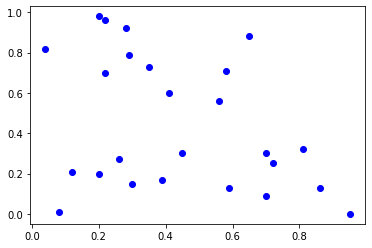

In [23]:
plt.scatter(x = data['x1'] , y = data['x2'] , color = 'blue')
plt.show()

#### نمودار پراکندگی متغیر توضیحی دوم را در مقابل متغیر توضیحی اول رسم میکنیم که هیچ الگویی در نمودار مشاهده نمیشود ، بنابراین نتیجه میگیریم که
#### .همخطی میان متغیرهای توضیحی وجود ندارد

#### البته راه های استنباطی بیشتری برای بررسی همخطی وجود دارد که ما در اینجا به از طریق نمودار پراکندگی متغیرهای توضیحی بسنده میکنیم

#### حال برای بررسی فرض خطی بودن مدل و مشاهده نوع رابطه متغیرهای توضیحی با متغیر پاسخ ، نمودار متغیرهای اضافه شده را رسم میکنیم

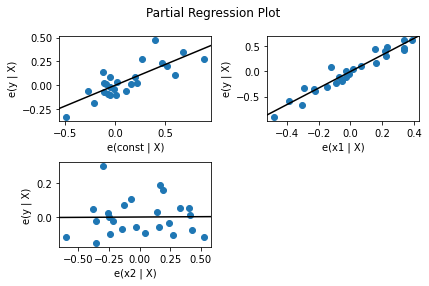

In [24]:
z = sm.graphics.plot_partregress_grid(lm1)
z.tight_layout(pad=1.0)

#### با توجه به نمودار سمت راست سطر اول یک رابطه خطی تقریبا قوی میان متغیرپاسخ و متغیر توضیحی اول مشاهده میشود

#### نمودار سطر دوم نشان میدهد که هیچ رابطه ای میان متغیرپاسخ و متغیرتوضیحی دوم وجود ندارد که دلیل بر عدم لزوم وجود این متغیر در مدل است

#### با توجه به استدلال های بصری و استنباطی ای که داشتیم متغیرتوضیحی دوم را از مدل حذف کرده و یک مدل خطی ساده میان متغیرپاسخ و متغیر توضیحی اول برازش میدهیم

#### بنابراین یک مدل خطی ساده میان متغیر پاسخ و متغیر توضیحی اول برازش میدهیم 

In [25]:
xc1 = sm.add_constant(x[:,0])
lm2 = sm.OLS(data['y'] , xc1).fit()
lms2 = lm2.summary()
lms2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     359.6
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.54e-15
Time:                        15:08:13   Log-Likelihood:                 20.695
No. Observations:                  25   AIC:                            -37.39
Df Residuals:                      23   BIC:                            -34.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4361      0.044      9.913      0.000       0.345       0.527
x1             1.6512      0.087     18.963      0.000       1.471       1.831
==============================================================================
Omnibus:                        6.216   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.300
Skew:                           0.954   Prob(JB):                        0.116
Kurtosis:                       3.697   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### .خروجی مدل را به جدول آنالیز واریانس ، ضرایب و آزمون فرض ها ، آماره های مهم تقسیم میکنیم

#### در جدول اول ستون اول تعداد نمونه(25) ، درجه آزادی مانده ها(23) ، درجه آزادی مدل(1) و در ستون دوم ضریب تعیین(0.94)،ضریب تعیین
#### تعدیل شده (0.937) ، آماره فیشر برای بررسی مناسبت مدل (369.6) و پی-مقدار آن تقریبا (0.000) محاسبه شده است

#### .تحلیل ضریب تعیین در اینجا یعنی 94 درصد تغییرات توسط مدل بیان میشود

#### همچنین به دلیل کوچکتر بودن پی-مقدار آماره فیشر از سطح معناداری 0.05 ، فرض جانشین   آزمون ، یعنی مناسبت مدل یا مخالف صفر بودن ضرایب 
#### .تایید میشود

#### در جدول دوم ، عرض از مبدا (0.4361) ، خطای استاندارد آن(0.044) ، همچنین برای آزمون فرض آن ، آماره تی محاسبه شده(9.913) و پی-مقدار آن(0.000) محاسبه شده است که به دلیل کوچکتر بودن آن از سطح معناداری 0.05 ، فرض 
#### .جانشین آزمون ، یعنی مخالف صفر بودن عرض از مبدا تایید میشود

#### ضریب متغیر توضیحی (1.6512) ، خطای استاندارد آن(0.087) ، همچنین برای آزمون فرض آن ، آماره تی محاسبه شده (18.963) و پی-مقدار آن (0.000) به 
#### دست آمده است که به دلیل کوچکتر بودن از سطح معناداری 0.05 ، فرض جانشین آزمون یعنی مخالف صفر بودن ضریب متغیر تایید میشود

#### همچنین برای عرض از مبدا و ضریب متغیر توضیحی فاصله اطمینان 95 درصدی محاسبه :شده است
####  (0.345,0.527) : عرض از مبدا
####  (1.471,1.831) : ضریب متغیر توضیحی اول

#### در جدول سوم نیز آماره دوربین واتسون و همچنین آماره جارکی برا به همرا پی-مقدارش ارئه .شده که آماره دوربین واتسون به دلیل نزدیک بودن به 2
#### نشان از ناهمبسته بودن باقیمانده ها و پی-مقدار آماره جارکی برا به دلیل بزرگرتر بودن از سطح معناداری 0.05 نشان از نرمال بودن توزیع مانده ها دارد

In [26]:
fit_value = lm2.predict(xc1)
fit_value

array([1.39379267, 1.85613123, 0.91494201, 0.76633319, 1.36076848,
       0.89842992, 0.56818809, 1.11308711, 0.79935737, 1.01401456,
       1.41030476, 0.79935737, 0.86540574, 0.63423646, 1.50937731,
       1.59193777, 0.9314541 , 1.59193777, 1.08006293, 1.62496195,
       1.17913548, 1.77357077, 0.50213972, 0.76633319, 2.00474005])

#### .در سلول کد بالا بردار مقادیر برازش شده را محاسبه کرده ایم

#### .در آخر نیز به تحلیل مانده ها میپردازیم

#### باقیمانده های مدل را جدا کرده و با مقادیر برازش یافته که در سلول کد قبل محاسبه کرده ایم در غالب یک دیتافریم نمایش میدهیم

In [27]:
resi = lm2.resid
data1 = pd.DataFrame({'resi': resi , 'fit_value': fit_value})
data1

,resi,fit_value
0,0.056207,1.393793
1,0.073869,1.856131
2,-0.104942,0.914942
3,-0.156333,0.766333
4,0.189232,1.360768
5,0.051570,0.898430
6,-0.118188,0.568188
7,0.026913,1.113087
8,-0.059357,0.799357
9,-0.034015,1.014015


C:\Users\Persian\Anaconda3\envs\Rpy\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


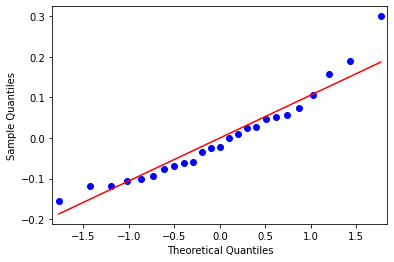

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics import gofplots as sgg
sgg.qqplot(data1['resi'] , line = 's')
plt.show()

#### نمودار فوق یک نمودار چندک چندک برای مطابقت داده ها (مانده ها) با توزیع نرمال است 
#### که بر اساس توزیع تجربی داده ها رسم شده است و خط نمودار نیز بر اساس توزیع نرمال با
#### میانگین صفر و واریانس یک رسم شده است و هرچه که نقاط رسم شده به خط ترسیم
#### شده نزدیک باشد و منطبق بر آن باشد فرض نرمال بودن داده ها با قوت بیشتری تایید میشود

#### با توجه به نمودار فرض نرمال بودن داده ها تایید میشود.

#### .برای اطمینان از این ادعا به استنباط آماری درباره توزیع داده ها میپردازیم

In [29]:
import scipy.stats as ss
a = ss.shapiro(data1['resi'])
b = ss.normaltest(data1['resi'])
c = ss.anderson(data1['resi'])

print(a) ; print(b)

print('Anderson.result','  statistic : ',c.statistic) ; cpp = c.statistic
for i in range(len(c.critical_values)):
    q = c.significance_level[i] ; w = c.critical_values[i]
    print(q,' : ',w)
    if q == 5 :
        cp = w

ShapiroResult(statistic=0.935318648815155, pvalue=0.11536164581775665)
NormaltestResult(statistic=6.216380258431699, pvalue=0.04468175039854325)
Anderson.result   statistic :  0.4646212485095589
15.0  :  0.514
10.0  :  0.586
5.0  :  0.703
2.5  :  0.82
1.0  :  0.975


#### در خروجی مدل نیز با استفاده از آماره جارکی برا و پی-مقدار آن نرمال بودن ماند ها را تایید کردیم ، در اینجا نیز با کمک آزمون فرض شاپیرو ویلک 
#### .اندرسون دارلینگ و نرمال تست و به دلیل بزرگتر بودن پی-مقدار آنها از 0.05 از نرمال بودن توزیع مانده ها مطمئن میشویم

####  0.11536164581775665 : پی-مقدار آزمون شاپیرو ویلک
####  0.04468175039854325 : پی-مقدار آزمون نرمال تست
#### 0.703               : پی-مقدار آزمون اندرسون دارلینگ

#### البته پی-مقدار آزمون نرمال تست کمی کوچکتر از سطح معناداری 0.05 است که با اغماض آن را میپذیریم

#### نمودار پراکنش مقادیر مانده ها در برابر مقادیر برازش شده را رسم میکنیم ، از این نمودار برای بررسی فرض خطی بودن مدل و همگنی واریانس خطاها استفاده میکنیم

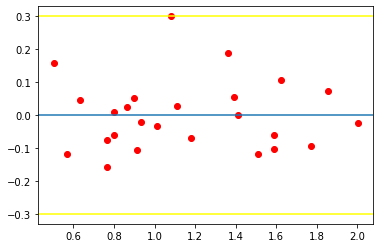

In [30]:
plt.scatter(x = data1['fit_value'] , y = data1['resi'] , color = 'red')
plt.axhline(0)
plt.axhline(0.3 , color = 'yellow')
plt.axhline(-0.3 , color = 'yellow')
plt.show()

#### با توجه به اینکه نقاط نمودار در یک نوار افقی و حول محور صفر به صورت تصادفی و بدون داشتن الگوی خاصی توزیع شده اند ،بنابراین فرض خطی بودن مدل تایید میشود

#### با توجه به اینکه پراکندگی نقاط نمودار در سرتاسر محور افقی یکسان است و الگوی خاصی ندارد ، بنابراین فرض همگنی واریانس خطاها نیز تایید میشود

#### .حال فرض ناهمبسته بودن خطاها را بررسی میکنیم

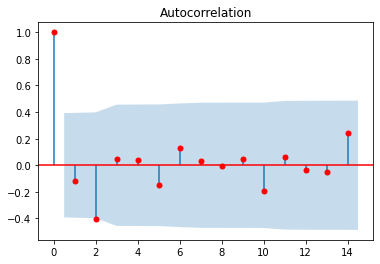

In [31]:
sm.graphics.tsa.plot_acf(data1['resi'] , color = 'red')
plt.show()

#### با توجه به نمودار خودهمبستگی مانده ها ، تمام لگ ها به جز لگ صفر و دو همه داخل بازه اطمینانشان هستند ، لگ صفر منطقا و همیشه یک هست ، بنابراین چون فقط 
#### یک لگ بیرون از بازه اطمینان هست با اغماض میتوانیم ناهمبسته بودن مانده ها را تایید کنیم

#### البته در خروجی مدل نیز با استفاده از آماره دوربین واتسون ناهمبسته بودن مانده ها تایید شده بود

##  : نتیجه گیری تحلیل مانده ها
### .هرچهار فرض بنیادی تایید شدند

#### فرض خطی بودن مدل رگرسیونی 
#### فرض همگن بودن واریانس خطاها
#### فرض ناهمبسته بودن خطاها
#### فرض نرمال بودن خطاها

# نتیجه گیری نهایی

### : مدل زیر مورد تایید میباشد

### y = 0.4361 + 1.6512*x1